In [ ]:
import rkn_module_benford_law as rkn_benford

import sys
import csv
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.image as mpimg

# 1. Goal

 Using Benford's Law theory, test whether the numbers of deaths of Covid-19 informed by governments are experiencing some kind of manipulation or falsification ( voluntary or not )

# 2. Loading the DataSet

In [ ]:
data = pd.read_csv(path, encoding='ISO-8859-1', delimiter=',' , low_memory=False)

data_mod = data.copy()

df = pd.DataFrame(data_mod)

# 3. Analysis on the Original Data Set

In this section we want to analyze the data for confirmed deaths took from French government data. This dataset shows the number of confirmed deaths of Covid-19 per country and per country's state when possible. The period of analysis goes from 20/jan/2020 to 18/apr/2020.

Then, let's check for:

* Number of NaN in each variable
* Variable types
* Variable categories

In [3]:
# df to store the analysis
df_analysis = pd.DataFrame(columns=['var_name', 'var_NaN', 'var_not_NaN', "var_min", "var_max" , "var_mean" , 'var_type', 'var_categ'])

In [4]:
# Column names in dataSet
coluna_name_list = list(df.columns.values)

In [5]:
# This routine will store on df_analise the number os NaN each variable from dataset has. Alto the variable type and its categories.
for i in coluna_name_list:
    if(df[i].dtypes == "object"):
        lista=[i, df[i].isna().sum(), df[i].count(), "NA", "NA", "NA", df[i].dtypes, "numerical variable"]
        df_length = len(df_analysis)
        df_analysis.loc[df_length] = lista
    else:
        lista=[i, df[i].isna().sum(), df[i].count(), df[i].min(), df[i].max(), df[i].mean(), df[i].dtypes, "numerical variable"]
        df_length = len(df_analysis)
        df_analysis.loc[df_length] = lista

In [6]:
# Set var_name as index
df_analysis.set_index('var_name', inplace=True)

In [7]:
# For each non numerical variable assign its possible values
for i in coluna_name_list:
    if(df_analysis.loc[i, "var_type"] == "object"):
        df_analysis.loc[i, "var_categ"] = list(df[i].unique())
    else:
        pass

In [8]:
df_analysis.sort_values("var_NaN", ascending=False)

,var_NaN,var_not_NaN,var_min,var_max,var_mean,var_type,var_categ
var_name,,,,,,,
Province/State,182,82,NA,NA,NA,object,"[nan, Australian Capital Territory, New South ..."
3/12/20,0,264,0,3056,17.8788,int64,numerical variable
3/20/20,0,264,0,4032,42.7992,int64,numerical variable
3/19/20,0,264,0,3405,37.375,int64,numerical variable
3/18/20,0,264,0,3122,33.0795,int64,numerical variable
...,...,...,...,...,...,...,...
2/14/20,0,264,0,1457,5.76894,int64,numerical variable
2/13/20,0,264,0,1310,5.19318,int64,numerical variable
2/12/20,0,264,0,1068,4.23485,int64,numerical variable


# 4. Creating modified data sets

For this section we want to aggregate the daily numbers into weekly numbers. This aggregation is important since many cases that happen in one day may only be informed some days later. 

We also gonna concatenate the country name and the country state into a unique column named: Country_State

Then, we will produce to excel files:

* **df_merge_deaths.xlsx**: This file contains the number of new cases per day, per week and the accumulated up to the date. These numbers are shown per country and per day (from 22/jan/2020 to 11/apr/2020). This file will not be used on the work, but may be useful for researchers.

* **df_week_deaths.xlsx**: This file contains in each row the name of the Country/State plus the number of confirmed new cases of Covid-19 for each week from 22/jan/2020 to 11/apr/2020. This is the data that will be used further for the Benford's analysis.

In [9]:
# Create a new column with country names. If a country has no provinces/state desaggregation, so it will show the term: Single Unity
df["Province/State"] = df["Province/State"].replace(np.NaN, "Single Unity")
df["Country_State"] = df["Country/Region"] + "_" + df["Province/State"]

In [10]:
# Remove unecessary columns
del df["Province/State"]
del df["Country/Region"]
del df["Lat"]
del df["Long"]

In [11]:
df

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,Country_State
0,0,0,0,0,0,0,0,0,0,0,...,6,7,7,11,14,14,15,15,18,Afghanistan_Single Unity
1,0,0,0,0,0,0,0,0,0,0,...,17,20,20,21,22,22,23,23,23,Albania_Single Unity
2,0,0,0,0,0,0,0,0,0,0,...,105,130,152,173,193,205,235,256,275,Algeria_Single Unity
3,0,0,0,0,0,0,0,0,0,0,...,16,17,18,21,22,23,25,26,26,Andorra_Single Unity
4,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,Angola_Single Unity
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,France_Saint Pierre and Miquelon
260,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,South Sudan_Single Unity
261,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Western Sahara_Single Unity
262,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Sao Tome and Principe_Single Unity


In [12]:
# Send columns to rows
df_melt = df.melt(id_vars=["Country_State"],
       var_name="Date",
       value_name="Deaths_Accumulated")

In [13]:
# Assign date type
df_melt['Date'] = pd.to_datetime(df_melt['Date'])

In [14]:
# Sort by country and date
df_melt = df_melt.sort_values(["Country_State", "Date"], ascending = (True, True))

In [15]:
# New column to receive the new cases for each day
df_melt["Deaths_New_Day"] = 0
# This function will assign to each country/day the number of new cases confirmed, based on the difference among accumulated cases of the actual and last day.
country_before = df_melt.iloc[0,0]

for row in range(1, df_melt.shape[0], 1):
    country_actual = df_melt.iloc[row,0]
    if(country_actual == country_before):
        df_melt.iloc[row,3] = df_melt.iloc[row,2] - df_melt.iloc[row-1,2]
    else:
        df_melt.iloc[row,3] = df_melt.iloc[row,2]
    country_before = country_actual

In [16]:
# Reset index: drop = False
df_melt.reset_index(inplace = True, drop = True)

In [17]:
# Create column to store de number of the week
df_melt['Date_week'] = pd.DatetimeIndex(df_melt['Date']).week

In [18]:
# New dataFrame grouped by country and week. The column value represents the number of new cases in each week per country.
df_agg_week = (df_melt.groupby(['Country_State', 'Date_week']).sum()).copy()

In [19]:
# Remove columns & rename columns
del df_agg_week["Deaths_Accumulated"]
df_agg_week = df_agg_week.rename(columns = {"Deaths_New_Day": "Deaths_New_Week"})

In [20]:
# Set index to columns: drop = False
df_agg_week.reset_index(inplace = True, drop = False)

## Data to be used further on our analysis

In [21]:
# This is the data that will be used on our analysis
df_week = df_agg_week.copy()
del df_week["Date_week"]
df_week.to_excel("df_week_deaths.xlsx")

In [22]:
df_week

,Country_State,Deaths_New_Week
0,Afghanistan_Single Unity,0
1,Afghanistan_Single Unity,0
2,Afghanistan_Single Unity,0
3,Afghanistan_Single Unity,0
4,Afghanistan_Single Unity,0
...,...,...
3163,Zimbabwe_Single Unity,0
3164,Zimbabwe_Single Unity,0
3165,Zimbabwe_Single Unity,1
3166,Zimbabwe_Single Unity,0


## Usefull Data for researchers

In [23]:
# Create key-column (Country_week) to join both dataFrames
df_melt["Country_week"] = df_melt["Country_State"] + "-" + df_melt["Date_week"].astype(str)
df_agg_week["Country_week"] = df_agg_week["Country_State"] + "-" + df_agg_week["Date_week"].astype(str)

In [24]:
# Reorder column
df_agg_week = df_agg_week[['Country_week', 'Deaths_New_Week']]
df_melt = df_melt[["Country_week", 'Country_State', 'Date', "Date_week", "Deaths_Accumulated", "Deaths_New_Day"]]

In [25]:
# Create the final dataFrame with number of accumulated cases, daily cases and weekly cases. Key-column: Country_week
df_merge = df_melt.merge(df_agg_week, on="Country_week")

In [26]:
# Remove key column
del df_merge["Country_week"]

In [27]:
# Show final data and send to excell
df_merge.to_excel("df_merge_deaths.xlsx")

In [28]:
# Note that we have few weeks of information per country. Insufficient for an analysis ungrouped per country.
df_merge

,Country_State,Date,Date_week,Deaths_Accumulated,Deaths_New_Day,Deaths_New_Week
0,Afghanistan_Single Unity,2020-01-22,4,0,0,0
1,Afghanistan_Single Unity,2020-01-23,4,0,0,0
2,Afghanistan_Single Unity,2020-01-24,4,0,0,0
3,Afghanistan_Single Unity,2020-01-25,4,0,0,0
4,Afghanistan_Single Unity,2020-01-26,4,0,0,0
...,...,...,...,...,...,...
21379,Zimbabwe_Single Unity,2020-04-07,15,2,1,2
21380,Zimbabwe_Single Unity,2020-04-08,15,3,1,2
21381,Zimbabwe_Single Unity,2020-04-09,15,3,0,2
21382,Zimbabwe_Single Unity,2020-04-10,15,3,0,2


# 5. Application: Confirmed deaths of Covid-19 per week

For this analysis we are taking our treated data set with only the number of new cases per week. 

The idea is to select a sample size from this data set and analyze the frequency in which appears numbers from 1 to 9 in the first position of the values selected. Then we compare these frequencies to those predicted by Benford's theory. We will be using a chi-squared test for statistical significance. 

Since the sample per country is very small (only 15 weeks of information per country), we will be only interested to analyze frequencies of the entire data set as a whole. Later, in the end of the year when we have more data per country, then we may analyze frequencies per country too.

## 5.1. Analysis of the data set

In [29]:
# Note that it is possible to have a negative new number of cases. Meaning that in such a week the government corrected the numbers informed in the previous week.
df_week.describe()

,Deaths_New_Week
count,3168.000000
mean,34.249684
std,378.120706
min,-4.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,10844.000000


In [30]:
# Some deeper analysis
df_analysis_desc = (df_week.groupby(['Country_State']).describe()).copy()
df_analysis_desc

Deaths_New_Week                             \
                                          count       mean        std  min   
Country_State                                                                
Afghanistan_Single Unity                   12.0   1.500000   3.205110  0.0   
Albania_Single Unity                       12.0   1.916667   3.449857  0.0   
Algeria_Single Unity                       12.0  22.916667  46.562682  0.0   
Andorra_Single Unity                       12.0   2.166667   4.018895  0.0   
Angola_Single Unity                        12.0   0.166667   0.577350  0.0   
...                                         ...        ...        ...  ...   
West Bank and Gaza_Single Unity            12.0   0.166667   0.389249  0.0   
Western Sahara_Single Unity                12.0   0.000000   0.000000  0.0   
Yemen_Single Unity                         12.0   0.000000   0.000000  0.0   
Zambia_Single Unity                        12.0   0.166667   0.389249  0.0   
Zimbabwe_Single Unity                      12.0   0.250000   0.621582  0.0   

                                                         
                                 25%  50%    75%    max  
Country_State                                            
Afghanistan_Single Unity         0.0  0.0   1.50   11.0  
Albania_Single Unity             0.0  0.0   1.50   10.0  
Algeria_Single Unity             0.0  0.0  13.25  123.0  
Andorra_Single Unity             0.0  0.0   2.00   12.0  
Angola_Single Unity              0.0  0.0   0.00    2.0  
...                              ...  ...    ...    ...  
West Bank and Gaza_Single Unity  0.0  0.0   0.00    1.0  
Western Sahara_Single Unity      0.0  0.0   0.00    0.0  
Yemen_Single Unity               0.0  0.0   0.00    0.0  
Zambia_Single Unity              0.0  0.0   0.00    1.0  
Zimbabwe_Single Unity            0.0  0.0   0.00    2.0  

[264 rows x 8 columns]

## 5.2 Running the script

* This work uses the following utility script: "RKN Module - Benford Law". For more on how to use this script, please access:
https://www.kaggle.com/rafaelknunes/rkn-module-benford-law-tutorial/notebook

In [31]:
# Getting hints (1 for aggregated analysis)
rkn_benford.hints(df_week, 1)

----------------------------------------
# Chi-squared table of critical values #
----------------------------------------

                      first digit  second digit  third digit
1% of significance         20.09         21.67        21.67
5% of significance         15.51         16.92        16.92
10% of significance        13.36         14.68        14.68



This is an aggregated analysis. The max sample size for D1 is: 662, for D2: 235 and for D3 is: 76.

--- End Hint ---




In [32]:
# df_week: data set with the values to be analyzed
# 1: Aggregated analysis (Since the sample per country is very small, we are only interested to analyze frequencies of the entire data set as a whole.)
# 10: Number of rounds we will run the code in order to produced an averaged chi-squared value.
# 600: Sample size for the first digit analysis.
# 150: Sample size for the second digit analysis.
# 76: Sample size for the third digit analysis.
# 1: Number of graphs to produce with the best chi-sq values.
# 1: Number of graphs to produce with the worst chi-sq values. Same as the graph before.
table_app = rkn_benford.benford(df_week, 1, 10, 600, 150, 76, 1, 1, "output_deaths.xlsx", "")

CHECK 1: PASS! The data has 2 columns!

CHECK 2: PASS! The one numeric and other text column.

This code will produce results considering all units from the dataset as a whole (If that applies).

This code will produce the chi-squared value based on the average value of 10 rounds.

This code will select a sample size of 600 from units when analysing D1. Then a sample size of 150 for D2 and 76 for D3.

This code will generate 1 graphs from units with worst chi-squared and 1 for units with the best chi-squared results.

-------------------------- Now wait. The program starts now!  -----------------------------


Graph generated with success!

-> Running the code for the digit 1 and considering the sample size for each unit equals to: 600

Graph generated with success!

-> Running the code for the digit 2 and considering the sample size for each unit equals to: 150

Graph generated with success!

-> Running the code for the digit 3 and considering the sample size for each unit equals to: 

### 5.2.1. First digit results

In this application we will use a sample size of 600 out of 662 possibles. The chi-squared obtained 71.67 is very high. In such case there is evidence of data manipulation.

However, our analysis focused only on the entire data. Maybe an analysis per country would reveal that some countries follow and others do not follow Benford's law. Unfortunately there is not enough data to make this investigation at the present moment.

In [33]:
# Order by city name
table_app[0].sort_values(by=['units'], inplace=True)
# Format table values
results_d1 = table_app[0].style.format({
    'N0': '{:,.2%}'.format, 'N1': '{:,.2%}'.format, 'N2': '{:,.2%}'.format, 'N3': '{:,.2%}'.format, 'N4': '{:,.2%}'.format, 'N5': '{:,.2%}'.format,
    'N6': '{:,.2%}'.format, 'N7': '{:,.2%}'.format, 'N8': '{:,.2%}'.format, 'N8': '{:,.2%}'.format, 'N9': '{:,.2%}'.format, 
    'chi_sq': '{:,.2f}'.format, 'chi_sq 10 rounds': '{:,.2f}'.format,
    })

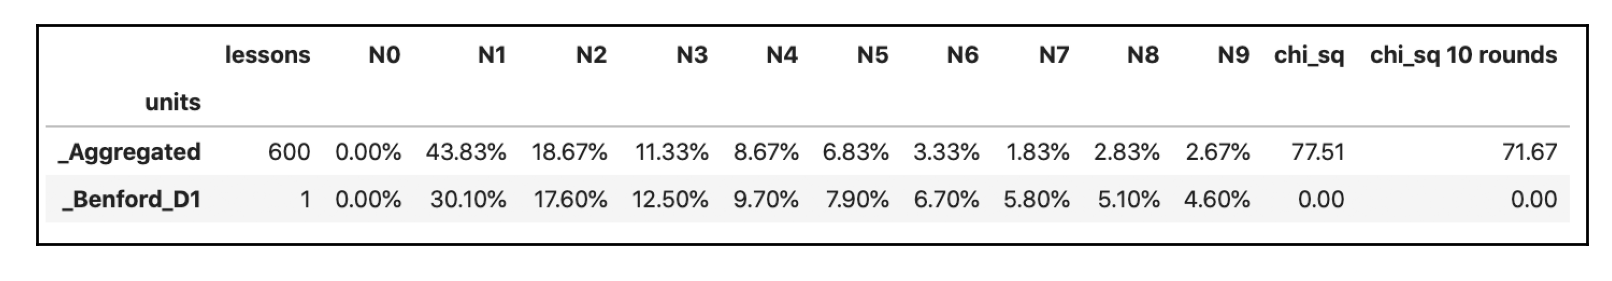

In [34]:
fig = plt.figure(figsize=(8,6), dpi=250)

a = fig.add_subplot(1, 1, 1)
imgplot = plt.imshow(mpimg.imread('../input/inputbenfordcovid19/D1__Aggregated_deaths_table.png'))

plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[]);

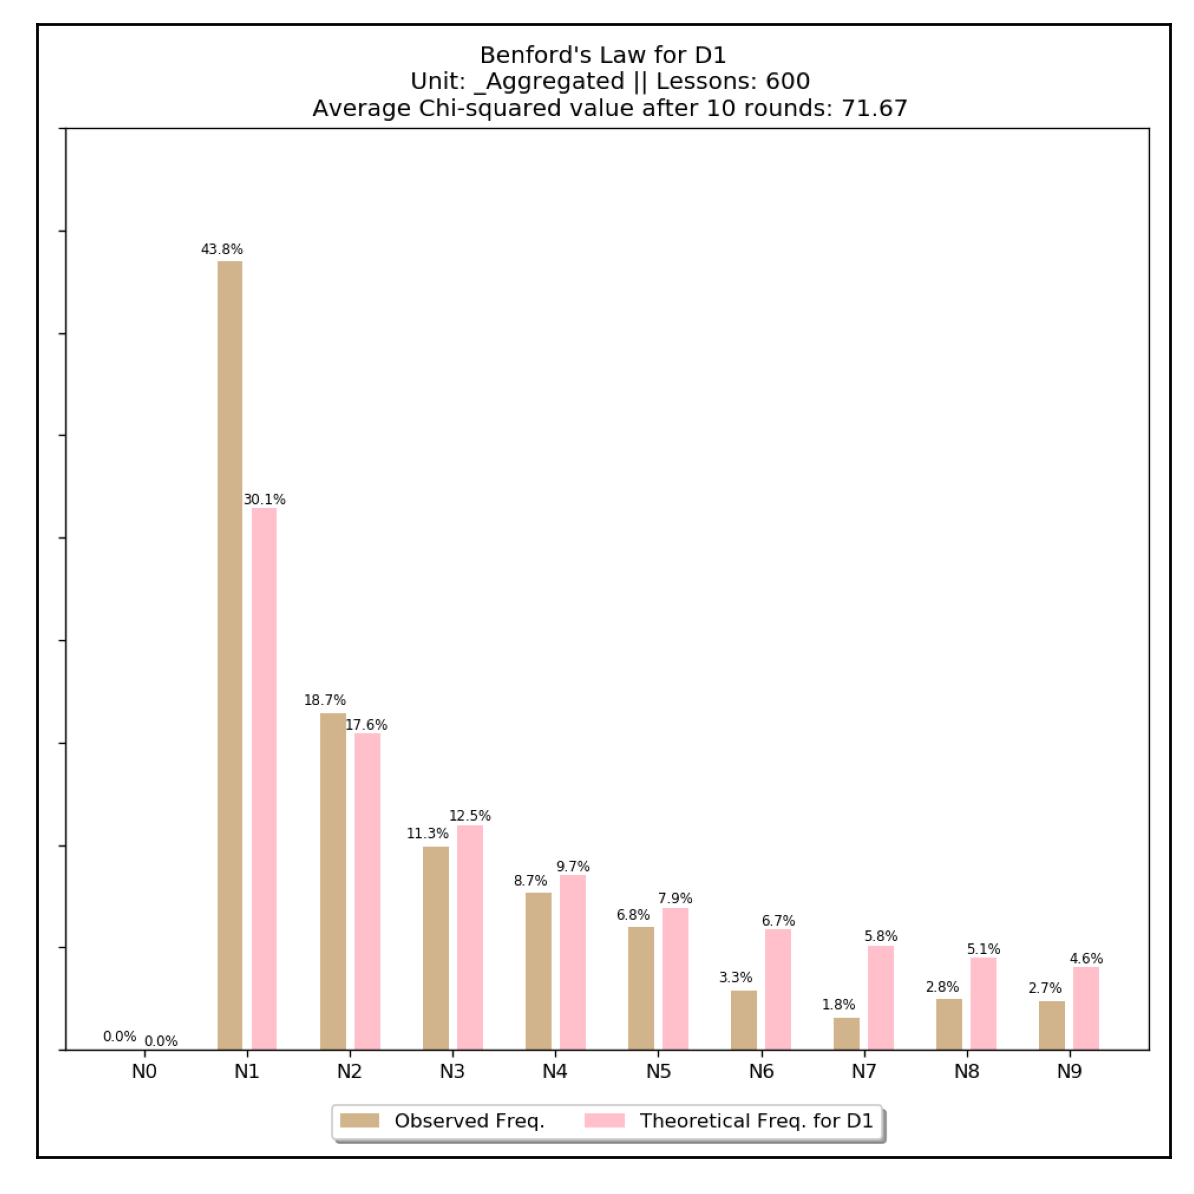

In [35]:
fig = plt.figure(figsize=(8,6), dpi=250)

a = fig.add_subplot(1, 1, 1)
imgplot = plt.imshow(mpimg.imread('../input/inputbenfordcovid19/D1__Aggregated_deaths.png'))

plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[]);

### 5.2.2. Second digit results

For the second digit we find a very low chi-squared value (5.4) which means that for the second digit the values informed by governments around the world adhere to the Benford's Law.

Further analysis per country still needed.

In [36]:
# Order by city name
table_app[1].sort_values(by=['units'], inplace=True)
# Format table values
results_d2 = table_app[1].style.format({
    'N0': '{:,.2%}'.format, 'N1': '{:,.2%}'.format, 'N2': '{:,.2%}'.format, 'N3': '{:,.2%}'.format, 'N4': '{:,.2%}'.format, 'N5': '{:,.2%}'.format,
    'N6': '{:,.2%}'.format, 'N7': '{:,.2%}'.format, 'N8': '{:,.2%}'.format, 'N8': '{:,.2%}'.format, 'N9': '{:,.2%}'.format, 
    'chi_sq': '{:,.2f}'.format, 'chi_sq 10 rounds': '{:,.2f}'.format,
    })

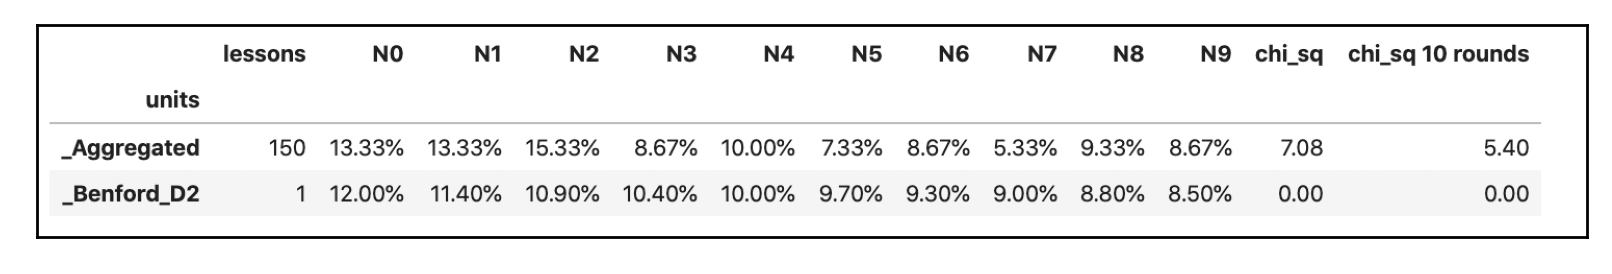

In [37]:
fig = plt.figure(figsize=(8,6), dpi=250)

a = fig.add_subplot(1, 1, 1)
imgplot = plt.imshow(mpimg.imread('../input/inputbenfordcovid19/D2__Aggregated_deaths_table.png'))

plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[]);

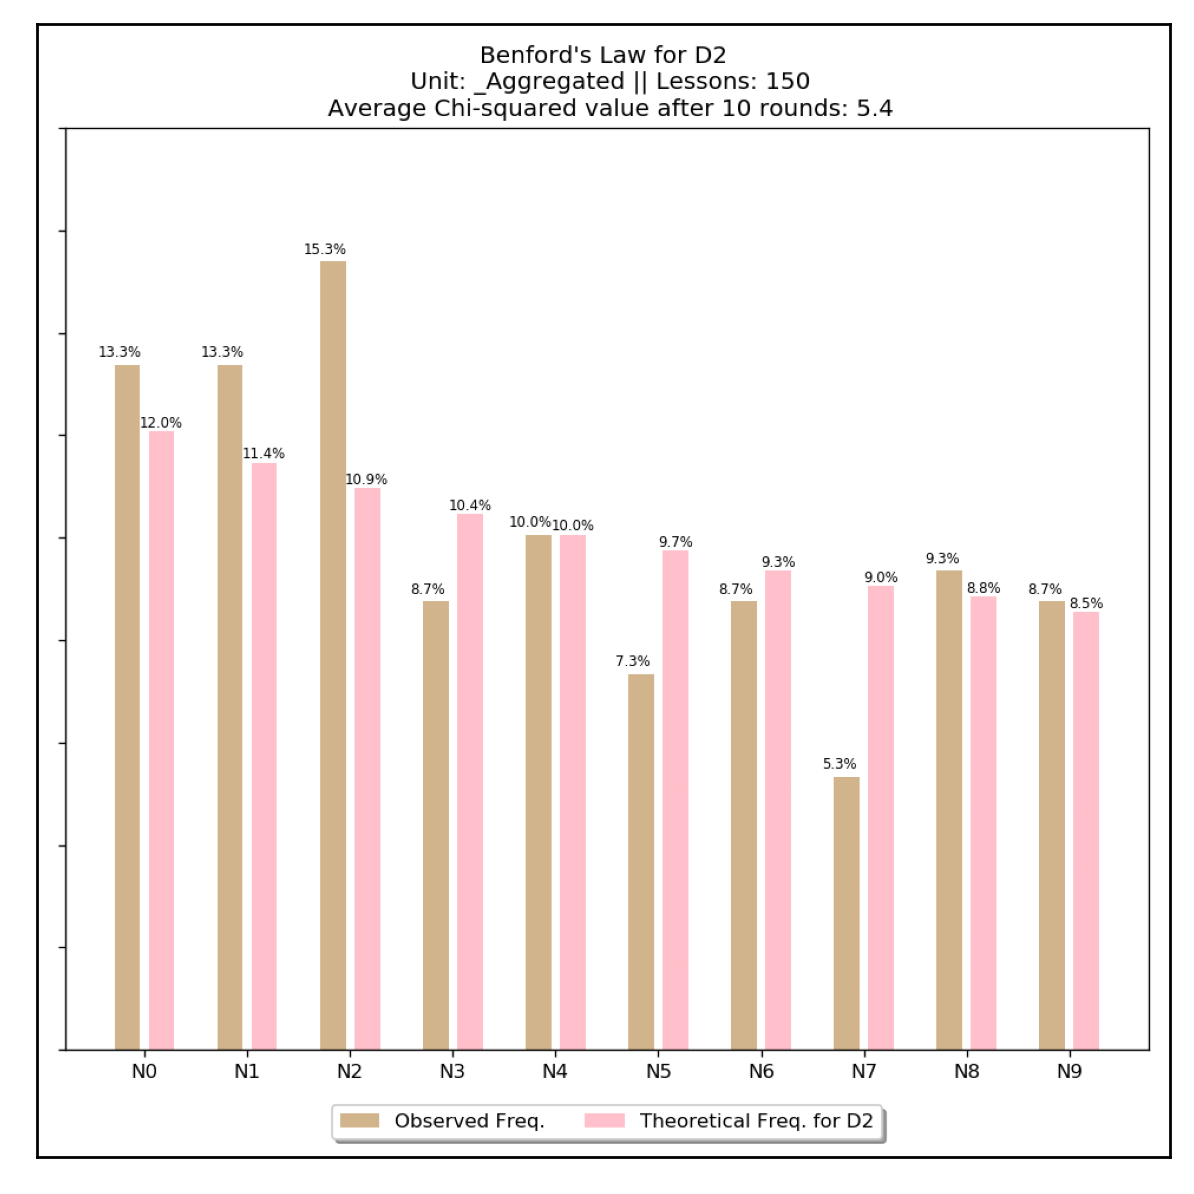

In [38]:
fig = plt.figure(figsize=(8,6), dpi=250)

a = fig.add_subplot(1, 1, 1)
imgplot = plt.imshow(mpimg.imread('Desktop/D2__Aggregated_deaths.png'))

plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[]);

### 5.2.3. Third digit results


For the third digit we have a very small sample size. That way no conclusion can be drawn.

# 6. Final Remarks

Along this work we tested the values of new confirmed deaths of Covid-19 per week informed by governments around the world. We took data from 20/jan/2020 to 18/apr/2020.

For the first digit we found evidences of potential "manipulation". We expected to see the number 1 in 30.1% of times. However, the actual percentage is far higher: 43.8%. This, However, does not necessary imply any kind of fraud, but that further analysis is necessary. Indeed there may be some misunderstanding of the cause of some deaths. Some patients may have died due to another disease and Covid was just an extra disease they had at this moment. Another reason may be that some people were about to die and Covid just shortened the few time they had alive so it's not exactly a Covid related death in this case.


For the second digit we found no evidence of data manipulation. And for the third digit there was not enough data for the analysis.